## Gradient Descent - Combined Cycle Power Plant
Combined Cycle Power Plant dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
You are given:
    1. A Readme file for more details on dataset. 
    2. A Training dataset csv file with X train and Y train data
    3. A X test File and you have to predict and submit predictions for this file.
Your task is to:
    1. Code Gradient Descent for N features and come with predictions.
    2. Try and test with various combinations of learning rates and number of iterations.
    3. Try using Feature Scaling, and see if it helps you in getting better results. 
Read Instructions carefully -
    1. Use Gradient Descent as a training algorithm and submit results predicted.
    2. Files are in csv format, you can use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
    3. Submit a csv file with only predictions for X test data. File should not have any headers and should only have one column i.e. predictions. Also predictions shouldn't be in exponential form.
    4. Your score is based on coefficient of determination. So it can be possible that nobody gets full score.



In [5]:
import numpy as np
import pandas as pd

In [6]:
# Loading Datasets

train_dataset = np.genfromtxt("../training_ccpp_x_y_train.csv", names = True, delimiter = ",")
train_df = pd.DataFrame(train_dataset)
print(train_df.describe())
num_cols = len(train_df.columns)
X_train = train_df.values[:, 0: num_cols -1 ]
Y_train = train_df.values[:, num_cols - 1]
print(X_train.shape)
print(Y_train.shape)

# print(X_train)
# print(Y_train)

test_dataset = np.genfromtxt("../test_ccpp_x_test.csv", names = None, delimiter = ",")
test_df = pd.DataFrame(test_dataset)
print(test_df.describe())
num_cols = len(test_df.columns)
X_test = test_df.values

print(X_test.shape)

# print(X_train)

                 T            V           AP           RH           EP
count  7176.000000  7176.000000  7176.000000  7176.000000  7176.000000
mean     19.629712    54.288154  1013.263032    73.275818   454.431293
std       7.475256    12.751468     5.964863    14.625093    17.134571
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.470000    41.740000  1009.010000    63.202500   439.737500
50%      20.315000    52.050000  1012.910000    74.895000   451.740000
75%      25.720000    66.540000  1017.302500    84.925000   468.667500
max      35.770000    81.560000  1033.300000   100.160000   495.760000
(7176, 4)
(7176,)
                0            1            2            3
count  2392.00000  2392.000000  2392.000000  2392.000000
mean     19.71579    54.358754  1013.247216    73.408457
std       7.38488    12.578763     5.861068    14.528135
min       3.38000    25.360000   993.740000    26.670000
25%      13.66000    41.730000  1009.300000    63.615000
5

In [7]:
def single_step(X, Y, m, alpha):
    n_1 = len(m)
    num_eg = len(X)
    slope_m = np.zeros(n_1) 
    
    for j in range(n_1):
        for i in range(num_eg) :
            slope_m[j] += (-2/num_eg)* ((Y[i] - (m *(X[i])).sum() ) * X[i][j] )    
    #for j in range(n_1):
            m[j] -= alpha*slope_m[j]
    return m

def cost(X, Y, m):
    cost = 0
    num_eg = len(X)
    for i in range(num_eg) :
        cost += ((Y[i] - (m * X[i]).sum())**2 )/num_eg
    return cost

def gd(X, Y, alpha, num_iters):
    num_eg = len(X)
    X = np.c_[X, np.ones(X.shape[0])]
    m = np.zeros(len(X[0]))
    costs = {}
    print(len(m))
    for i in range(num_iters):
        m = single_step(X, Y, m, alpha)
        if i % 10 == 0 :
            costs[i] = cost(X, Y, m)
            print(i, " ", costs[i])
    import matplotlib.pyplot as plt
    keys = [key for key in costs]
    values = [costs[key] for key in costs]
    plt.plot(keys, values)
    plt.show()
    return m

def predict(X, m) :
    X = np.c_[X, np.ones(X.shape[0])]
    Y = np.array([])
    for i in range(len(X)):
        Y_i = (X[i] * m).sum()
        Y = np.append(Y, Y_i)
    return Y

def scale_features(X_train) :
    import copy
    X = copy.deepcopy(X_train)
    means = np.array([X[:, i].mean() for i in range(X.shape[1])])
    stds = np.array([X[:, i].std() for i in range(X.shape[1])])
    
    for i in range(X.shape[0]) :
        X[i, :] = (X[i, :] - means)/stds
    return X
def score(Y_true, Y_pred) :
    mean = Y_true.mean()
    u = ((Y_true - Y_pred)**2).sum()
    v = ((Y_true - mean)**2).sum() 
    return 1 - (u/v)
# Introduce more features
def add_more_features (X_train, imp_cols_indices):
    X_train_df = pd.DataFrame(X_train)
    num_f = len(X_train_df.columns)
    col_names = X_train_df.columns
    new_df = X_train_df.copy()
    num_imp_cols = len(imp_col_indices)
    for i1 in range(num_imp_cols) :
        for j1 in range(i1, num_imp_cols):
            i = imp_cols_indices[i1]
            j = imp_cols_indices[j1]
            new_df[ str(col_names[i]) + "_" + str(col_names[j])] = X_train_df[i] * X_train_df[j]
    print(new_df.describe())
    return new_df.values

5
0   90591.80233102819
10   46.77036812916915
20   21.895014946021092
30   21.335081104861604
40   21.096249938308816
50   20.993545477327483
60   20.94954844158342
70   20.930835051525754
80   20.922967432544496
90   20.919721623007565
100   20.91842474531468
110   20.917935844440983
120   20.917772506605832
130   20.917733857735275
140   20.917738352447603
150   20.917754328847824
160   20.917770509939896
170   20.91778362851404
180   20.917793340138825
190   20.917800203382715


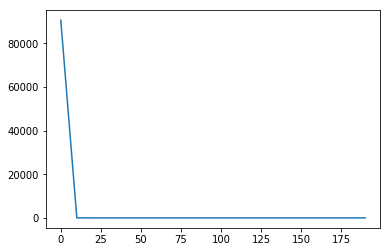

[-1.49020056e+01 -2.84263610e+00  3.58853572e-01 -2.38253498e+00
  4.54458749e+02]
Duration:  47.90234041213989 second


In [18]:
imp_col_indices = [0, 1, 2, 3]
import time
s_t = time.time()
#X_train_new = add_more_features(X_train, imp_col_indices)
X_train_scaled = scale_features(X_train)
m = gd(X_train_scaled, Y_train, 0.00005, 200)
print(m)
e_t = time.time()
print("Duration: ",e_t-s_t, "second")

In [19]:
#X_test_new = add_more_features(X_test, imp_col_indices)
X_test_scaled = scale_features(X_test)
Y_pred = predict(X_test_scaled, m)
np.savetxt("ccpp_dataset_pred.csv", Y_pred, '%.5f')
print(score(Y_train, predict(X_train_scaled, m)))


0.9287425715704402
